In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#deep learning
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Activation , BatchNormalization , Flatten , Dense , Conv2D , MaxPool2D

from keras.utils import to_categorical

#machine learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , confusion_matrix

In [8]:
from tqdm import tqdm
import os
imagepath = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    if 'image' in dirname:
        for filename in filenames:
            if filename.endswith('png'):
                imagepath.append(os.path.join(dirname, filename))

In [13]:
import cv2
data = []
target = []
resize = 150

cat = {'Viral Pneumonia': 'pneumonia' , 'Normal': 'normal' , 'COVID':'covid'}

for imagepat in tqdm(imagepath):
    label = imagepat.split(os.path.sep)[-3]
    if label not in cat:
        continue
    image = cv2.imread(imagepat)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , (resize,resize))/255.0
    data.append(image)
    target.append(cat[label])
    
    
print(f"processed {len(data)} images")

100%|██████████| 21165/21165 [01:37<00:00, 216.61it/s]  

processed 15153 images


In [15]:
print(len(data))
print(len(target))

15153
15153


In [21]:
le = LabelEncoder()
label= le.fit_transform(target)
label = to_categorical(label)

print(le.classes_)
print(label[0])

['covid' 'normal' 'pneumonia']
[0. 1. 0.]


In [29]:
# First split into training and testing sets
(x_train, x_test, y_train, y_test) = train_test_split(data, label, test_size=0.20, stratify=label, random_state=42)

# Second split into training and validation sets
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

trainX = np.array(x_train)
trainY = np.array(y_train)
testX = np.array(x_test)
testY = np.array(y_test)
valX = np.array(x_val)
valY = np.array(y_val)


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(9697, 150, 150, 3)
(3031, 150, 150, 3)
(9697, 3)
(3031, 3)
(2425, 150, 150, 3)
(2425, 3)


In [36]:
model = keras.Sequential()
#cnn layers
#first layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))

#second layer
model.add(Conv2D(filters=64 , kernel_size = (3,3) , activation = 'relu')),
model.add(MaxPool2D(pool_size=(2,2))),
#third layer
model.add(Conv2D(filters=128 , kernel_size = (3,3) , activation = 'relu')),
model.add(MaxPool2D(pool_size=(2,2) , strides=(1,1))),


#ann layers
#first layer
model.add(Flatten()),
model.add(Dense(64 ,activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(3 , activation = 'softmax'))

In [37]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 33, 33, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 139392)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     8,921,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,014,595 (34.39 MB)

 Trainable params: 9,014,595 (34.39 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy']
)

In [40]:
model.fit(trainX ,trainY , epochs = 20 , batch_size = 40 , verbose=1 , validation_data =(valX , valY) ,)

Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 231s 941ms/step - accuracy: 0.7371 - loss: 1.0022 - val_accuracy: 0.8915 - val_loss: 0.2767
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 216s 887ms/step - accuracy: 0.8961 - loss: 0.2595 - val_accuracy: 0.9089 - val_loss: 0.2193
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 219s 900ms/step - accuracy: 0.9311 - loss: 0.1893 - val_accuracy: 0.9237 - val_loss: 0.1995
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 219s 901ms/step - accuracy: 0.9516 - loss: 0.1324 - val_accuracy: 0.9402 - val_loss: 0.1662
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 213s 877ms/step - accuracy: 0.9607 - loss: 0.1097 - val_accuracy: 0.9472 - val_loss: 0.1545
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 260s 871ms/step - accuracy: 0.9711 - loss: 0.0840 - val_accuracy: 0.9493 - val_loss: 0.1549
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 214s 882ms/step - accuracy: 0.9791 - loss: 0.0554 - val_accuracy: 0.9303 - val_loss: 0.1964
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 218s 898ms/step - accuracy: 0.9759 -

In [42]:
prediction= model.predict(testX)
y_pred= np.argmax(prediction  , axis=1)

y_test = np.argmax(prediction , axis=1)
cm = confusion_matrix(y_pred , y_test)

print(cm)

95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step
[[ 665    0    0]
 [   0 2147    0]
 [   0    0  219]]


In [43]:
class_name = le.classes_

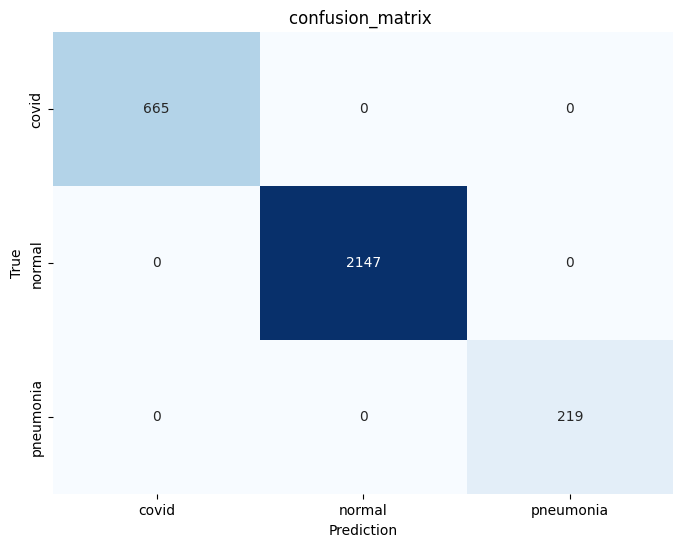

In [49]:
confusion_matrix = pd.DataFrame(cm , index = class_name , columns= class_name)
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix , annot=True , cbar=False ,fmt='d' ,cmap='Blues')
plt.title('confusion_matrix ')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

In [55]:
print(classification_report(y_test , y_pred , target_names=class_name , digits=5))

              precision    recall  f1-score   support

       covid    1.00000   1.00000   1.00000       665
      normal    1.00000   1.00000   1.00000      2147
   pneumonia    1.00000   1.00000   1.00000       219

    accuracy                        1.00000      3031
   macro avg    1.00000   1.00000   1.00000      3031
weighted avg    1.00000   1.00000   1.00000      3031



In [58]:
model.save('covid-detection-model.h5')

import pickle
pickle.dump(le, open('lebel_encoder.pkl','wb'))
print('save')

save


***REAL-TIME-DETECTION***

In [59]:
from tensorflow.keras.models import load_model
load_models = load_model('covid-detection-model.h5')
load_le = pickle.load(open('lebel_encoder.pkl' ,'rb'))

In [87]:
def prediction_system(image_path , load_models ,le , image_size = 150):
    #load_image
    load_image = cv2.imread(image_path)
    if load_image is None:
        raise ValueError(f"something wrong {image_path} in this path")
    #preprocessing
    image = cv2.cvtColor(load_image, cv2.COLOR_BGR2RGB)
    image_resize = cv2.resize(image ,(image_size,image_size))
    image_scaled = image_resize/255.0
    image_input = np.expand_dims(image_scaled,axis=0)
    prediction = model.predict(image_input)
    prediction_label = np.argmax(prediction)
    confidance_score = prediction[0][prediction_label]
    
    label = le.inverse_transform([prediction_label])[0]
    
    #for image
    plt.imshow(image_resize)
    plt.title(f"predicted {label} , confidance level : {confidance_score*100:.2f}%")
    plt.ylabel('off')
    plt.show()
    
    return label , confidance_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


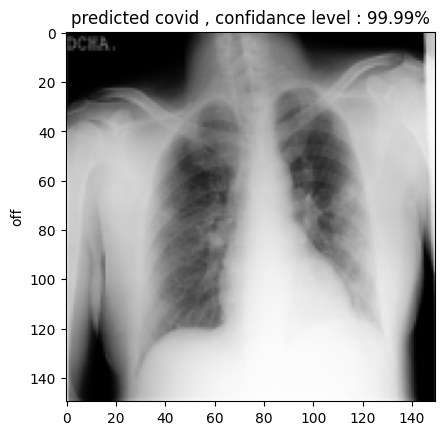

In [89]:
image_path='/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images/COVID-100.png'
prediction_label , confidance_score = prediction_system(image_path , load_model ,load_le)
